# Solución del examen 1

## Examen A

### Punto 1:

In [30]:
# Importing libraries
from numpy import loadtxt, zeros
from pylab import plot, xlabel, ylabel, show, legend, grid

In [2]:
solman = loadtxt("../data/sunspots.txt", float)

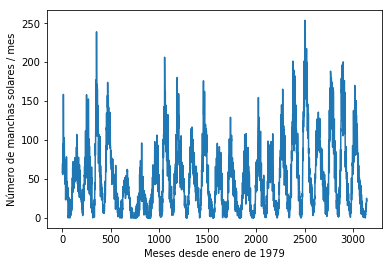

In [3]:
plot(solman[:,0], solman[:,1])
xlabel("Meses desde enero de 1979")
ylabel("Número de manchas solares / mes")
show()

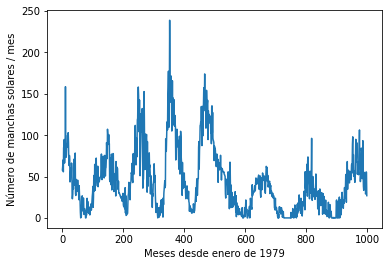

In [4]:
nm = 1000 # Número de meses

plot(solman[0:nm,0], solman[0:nm,1])
xlabel("Meses desde enero de 1979")
ylabel("Número de manchas solares / mes")
show()

Calculando el promedio usando la expresión:
    \begin{equation}
        Y_k = \frac{1}{2r+1} \sum^{r}_{m=-r}{y_{k+m}}
    \end{equation}

In [5]:
r = 5 # Número de meses sobre los que se promedia

y_prom = zeros(nm, float)
norm = 2*r + 1

for k in range( nm ):
    for m in range( -r, r+1 ):
        y_prom[k] += solman[(k+5)+m,1]
    y_prom[k] /= norm

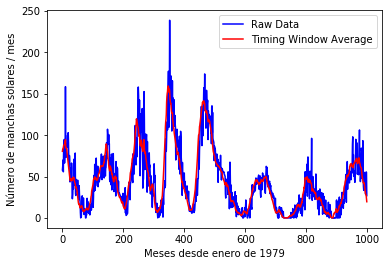

In [6]:
plot(solman[0:nm,0], solman[0:nm,1], 'b-', label="Raw Data")
plot(solman[0:nm, 0], y_prom, 'r-', label="Timing Window Average")
legend()
xlabel("Meses desde enero de 1979")
ylabel("Número de manchas solares / mes")
show()

### Punto 2:

In [7]:
def binomial(n, k):
    n_fact = 1
    k_fact = 1
    nk_fact = 1

    if k == 0 or k==n:
        coef = 1
    else:
        for i in range( int(n), 0, -1 ):
            n_fact *= i
        for j in range( int(k), 0, -1 ):
            k_fact *= j
        for l in range( int(n-k), 0, -1 ):
            nk_fact *= l
        
        coef = n_fact / (k_fact*nk_fact)
            
    return( int(coef) )

In [8]:
lanz = 100
cab = 60
print( binomial(lanz, cab)/2**lanz )

cab = 40
print( binomial(lanz, cab)/2**lanz )

0.010843866711637987
0.010843866711637987


## Examen B

In [60]:
from math import pi, sqrt, sin, cos
from pylab import imshow

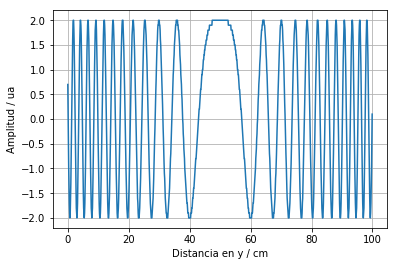

In [81]:
np = 1.e3 # Número de puntos por eje
size = 100. # cm
res = size/np # Resolución cm/puntos
lmda = 1.0 # cm
k = 2*pi/lmda

A1 = 1.0 # cm
A2 = 1.0 # cm

d_hole = 0.01 # cm, Separació entre los agujeros

x_hole1 = 0. # cm
y_hole1 = size/2. - d_hole/2. # cm

x_hole2 = 0. # cm
y_hole2 = size/2. + d_hole/2. # cm

x = zeros(int(np), float) # 
y = zeros(int(np), float) # Paralela a este eje se ubica la pantalla y la pared

for i in range(int(np)):
    x[i] = res*i # Distancias
    y[i] = res*i
    
ondas = open("difraction.dat", "w")

deltaX1 = size - x_hole1
deltaX2 = size - x_hole2

for j in range( len(y) ):
    
    deltaY1 = y[j] - y_hole1
    r1 = sqrt( deltaX1*deltaX1 + deltaY1*deltaY1 ) # Posición para onda 1
    
    deltaY2 = y[j] - y_hole2
    r2 = sqrt( deltaX2*deltaX2 + deltaY2*deltaY2 ) # Posición para onda 2
    
    zita1 = A1*cos(k*r1)
    zita2 = A2*cos(k*r2)
    ondas.write( "%0.1f %0.1f" % ( y[j], (zita1+zita2) ) )
    ondas.write("\n")
    
ondas.close()

data = loadtxt("difraction.dat", float)
plot(data[:,0], data[:,1]) #, origin="lower", extent=[0, 100, 0, 100])
xlabel("Distancia en y / cm")
ylabel("Amplitud / ua")
grid("on")
show()